# belosgraficos instagram.com/belosgraficos/

#### Notebook para a criação do gráfico do tipo cordilheira com a temperatura diária de Porto Alegre e Caxias do Sul no ano de 2020

### Comentários estão em português - Comments are in Portuguese

## Notebook criado utilizando o Kaggle
#### Dados: https://portal.inmet.gov.br/

Importando as bibliotecas necessarias para a execução do código

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Lendo o arquivos dados

In [2]:
# Lendo o arquivo CSV - Atenção para o caminho do arquivo
file_path_poa = '../input/temp-poa-caxias-2020-c/temperatura_poa_2020.csv'
file_path_caxias = '../input/temp-poa-caxias-2020-c/temperatura_caxias_2020.csv'
dataset_poa = pd.read_csv(file_path_poa, 
                          sep = ";")
dataset_caxias = pd.read_csv(file_path_caxias, 
                             sep = ";")

display(dataset_poa.head())
display(dataset_caxias.head())

,Data,Max,Med,Min
0,01/01/2020,34.4,27.40,24.4
1,02/01/2020,27.8,23.88,21.6
2,03/01/2020,27.9,23.30,19.6
3,04/01/2020,29.1,23.88,20.5
4,05/01/2020,32.6,25.70,19.5


,Data,Max,Med,Min
0,01/01/2020,29.6,23.24,20.6
1,02/01/2020,23.6,18.56,17.2
2,03/01/2020,22.8,17.80,15.4
3,04/01/2020,24.2,19.32,16.2
4,05/01/2020,28.2,21.80,16.4


Preparando os dados para a criação do gráfico

In [27]:
# Adicionando uma nova coluna 'Mes' contendo apenas o mês de cada data
dataset_poa['Mes'] = pd.to_datetime(dataset_poa['Data'], format='%d/%m/%Y').dt.month
dataset_caxias['Mes'] = pd.to_datetime(dataset_caxias['Data'], format='%d/%m/%Y').dt.month

# Criando um dicionário para traduzir cada número do mês em seu nome
month_dict = {1: 'Janeiro',
              2: 'Fevereiro',
              3: 'Março',
              4: 'Abril',
              5: 'Maio',
              6: 'Junho',
              7: 'Julho',
              8: 'Agosto',
              9: 'Setembro',
              10: 'Outubro',
              11: 'Novembro',
              12: 'Dezembro'}

# Atualizando nomes no dataset
dataset_poa['Mes'] = dataset_poa['Mes'].map(month_dict)
dataset_caxias['Mes'] = dataset_caxias['Mes'].map(month_dict)

# Calculando a temperatura média de cada mês para a criação da paletta de cores 
media_mensal_poa = dataset_poa.groupby('Mes')['Med'].mean()
media_mensal_caxias = dataset_caxias.groupby('Mes')['Med'].mean()

# Adicionando uma nova coluna 'media_mes' contendo a média de temperatura de cada mês
dataset_poa['media_mes'] = dataset_poa['Mes'].map(media_mensal_poa)
dataset_caxias['media_mes'] = dataset_caxias['Mes'].map(media_mensal_caxias)

# Adicionando coluna cidade para unir o dataset
dataset_poa['cidade'] = "Porto Alegre"
dataset_caxias['cidade'] = "Caxias do Sul"

# Verificando
display(dataset_poa.head())
display(dataset_caxias.head())

,Data,Max,Med,Min,Mes,media_mes,cidade
0,01/01/2020,34.4,27.40,24.4,Janeiro,25.458065,Porto Alegre
1,02/01/2020,27.8,23.88,21.6,Janeiro,25.458065,Porto Alegre
2,03/01/2020,27.9,23.30,19.6,Janeiro,25.458065,Porto Alegre
3,04/01/2020,29.1,23.88,20.5,Janeiro,25.458065,Porto Alegre
4,05/01/2020,32.6,25.70,19.5,Janeiro,25.458065,Porto Alegre


,Data,Max,Med,Min,Mes,media_mes,cidade
0,01/01/2020,29.6,23.24,20.6,Janeiro,21.579355,Caxias do Sul
1,02/01/2020,23.6,18.56,17.2,Janeiro,21.579355,Caxias do Sul
2,03/01/2020,22.8,17.80,15.4,Janeiro,21.579355,Caxias do Sul
3,04/01/2020,24.2,19.32,16.2,Janeiro,21.579355,Caxias do Sul
4,05/01/2020,28.2,21.80,16.4,Janeiro,21.579355,Caxias do Sul


In [41]:
# Unindo os dois datasets
dataset = pd.concat([dataset_poa, dataset_caxias], axis = 0)
dataset

,Data,Max,Med,Min,Mes,media_mes,cidade
0,01/01/2020,34.4,27.40,24.4,Janeiro,25.458065,Porto Alegre
1,02/01/2020,27.8,23.88,21.6,Janeiro,25.458065,Porto Alegre
2,03/01/2020,27.9,23.30,19.6,Janeiro,25.458065,Porto Alegre
3,04/01/2020,29.1,23.88,20.5,Janeiro,25.458065,Porto Alegre
4,05/01/2020,32.6,25.70,19.5,Janeiro,25.458065,Porto Alegre
...,...,...,...,...,...,...,...
361,27/12/2020,27.2,20.76,18.2,Dezembro,20.675484,Caxias do Sul
362,28/12/2020,27.2,20.76,17.4,Dezembro,20.675484,Caxias do Sul
363,29/12/2020,29.8,22.96,17.6,Dezembro,20.675484,Caxias do Sul
364,30/12/2020,30.6,25.28,19.6,Dezembro,20.675484,Caxias do Sul


#### Criando o gráfico

<Figure size 1080x1080 with 0 Axes>

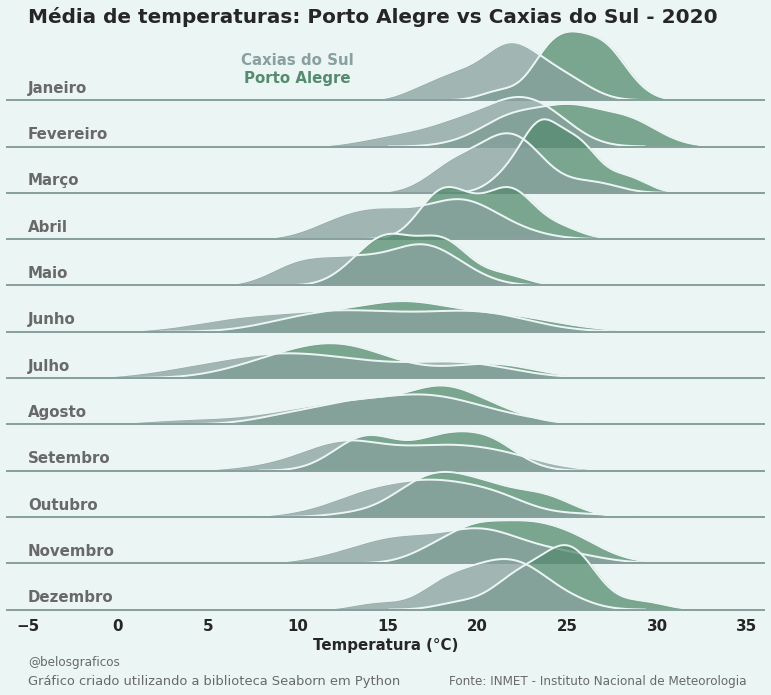

In [68]:
# Criando uma figura, com tamanho 15x15
plt.figure(figsize=(15, 15))

# Definindo tema do gráfico e cores de fundo
sns.set_theme(style="white", 
              rc={"axes.facecolor": (0, 0, 0, 0), # Cor de fundo dos eixos
                  'figure.facecolor':'#ebf5f4'})  # Cor de fundo da figura

# Criando um FacetGrid com uma linha para cada mês
# A média da temperatura mensal definirá a cor de cada um dos gráficos
g = sns.FacetGrid(dataset, 
                  row='Mes', 
                  hue= 'cidade', 
                  aspect=15, 
                  height=0.75, 
                  palette=['#558B6E', '#88A09E'])

# KDEplot de densidade para cada um dos meses
g.map(sns.kdeplot, 
      'Med',
      fill=True, 
      alpha=0.75, 
      linewidth=1.5)

# Linha branca contornando os KDEplots, apenas para efeito visual
g.map(sns.kdeplot, 
      'Med', 
      bw_adjust=1, 
      clip_on=False, 
      color="#ebf5f4", lw=2) # Usar a mesma cor do fundo da figura

# Linha horizontal em cada um dos plots, apenas para efeito visual
g.map(plt.axhline, 
      y=0,
      lw=2, 
      clip_on=False)

# Loopando sobre o FacetGrid para adicionar o nome do mês com a mesma cor do gráfico
# O comando ax.lines[-1].get_color() permite acessar a cor da linha
for i, ax in enumerate(g.axes.flat):
    ax.text(-5, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color='dimgray')
    
# Ajustando a altura dos gráficos para eles terem uma leve sobreposição
g.fig.subplots_adjust(hspace=-0.4)


# Removendo titulos dos eixos, ticks e spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# Adicionando label no eixo X - Temperatura
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperatura (°C)', fontweight='bold', fontsize=15)

# Adicionando título à figura
g.fig.suptitle('Média de temperaturas: Porto Alegre vs Caxias do Sul - 2020',
               ha='center',
               fontsize=20,
               weight='semibold')

# Adicionando notas de rodapé com a fonte dos dados e mais informações - utiliza as coordenadas
plt.text(35, -0.2, "Fonte: INMET - Instituto Nacional de Meteorologia", 
         horizontalalignment='right',
         va = 'baseline',
         size=12, color='dimgray')

plt.text(-5, -0.2, "Gráfico criado utilizando a biblioteca Seaborn em Python", 
         horizontalalignment='left',
         va = 'baseline',
         size=13, color='dimgray')

plt.text(-5, -0.15, "@belosgraficos", 
         horizontalalignment='left',
         va = 'baseline',
         size=12, color='dimgray')

plt.text(10, 1.45, "Caxias do Sul", 
         horizontalalignment='center',
         va = 'baseline', fontweight='bold',
         size=15, color='#88A09E')
plt.text(10, 1.4, "Porto Alegre", 
         horizontalalignment='center',
         va = 'baseline', fontweight='bold',
         size=15, color='#558B6E')

# Salva a figura e exibe o gráfico no console
plt.savefig("ridgeplot.png")
plt.show()